# デモ2 (ラインスタンプの識別)

## 1.ライブラリをインポートする

In [1]:
#ユーザが指定するべき部分のみコメント（灰色の文字）で示しています
!pip3 install tensorflow keras numpy matplotlib seaborn
#↑インストール
import sys
sys.path.append('./aitoolkit') 
from aitoolkit import ObjectDetector
from aitoolkit import plot_learning_history
%matplotlib inline
from IPython.display import Image

Using TensorFlow backend.


## 2. 既存の大規模なモデルを使う

In [2]:
#出てくるエラー（W0808とか）は無視してOK
import warnings
warnings.filterwarnings('ignore')
detector=ObjectDetector(train_data_dir = './images/train/line_stamps/',validation_data_dir = './images/validation/line_stamps/',\
                          result_data_dir = 'results/line_stamps/')
#↓ユーザはここを指定（学習率, モメンタム, batch_norm, dropout）
detector.create_model(sgd_lr=0.0001, sgd_momentum=0.9, original_model=None, batch_norm=True, dropout=True)
#original_model=None で既存のモデルを使う事を選択する

W0808 11:11:45.957285 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 11:11:45.978028 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 11:11:45.980589 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 11:11:46.018311 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



ラベル : 
['brown', 'james', 'cherrycoco', 'moon']


W0808 11:11:46.409193 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0808 11:11:46.410034 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0808 11:11:46.648101 4508992960 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1179712   
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
__________

W0808 11:11:47.211360 4508992960 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## 3. Fine-tuningの設定を行う
第三者が作ったVGG-16という、1000個の種類の画像を識別するモデルを初期状態として読み込んでいて、そのモデルの中で、どこを学習可能にして、どこを不変にするのかを設定する。Fine-tuningの時は学習率は小さめで良い。

In [3]:
for index in range(15): # 一番上から15番目のレイヤーまで重みを固定する。
    detector.deactivate_layer(index)

## 4.データセットの定義

In [4]:
#↓ユーザはここを指定
detector.create_datasets(batch_size=64, is_augmenting=True)

Found 162 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------

Index 1
[0.3444891  0.3334563  0.07258371 0.24947086]
予測：　　brown


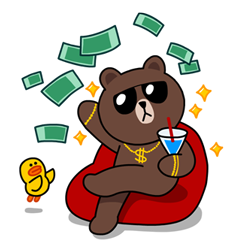

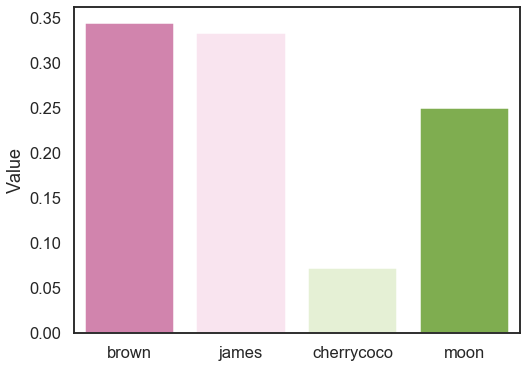


Index 2
[0.17574161 0.45098665 0.10064597 0.27262574]
予測：　　james


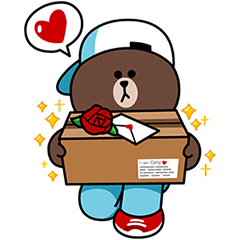

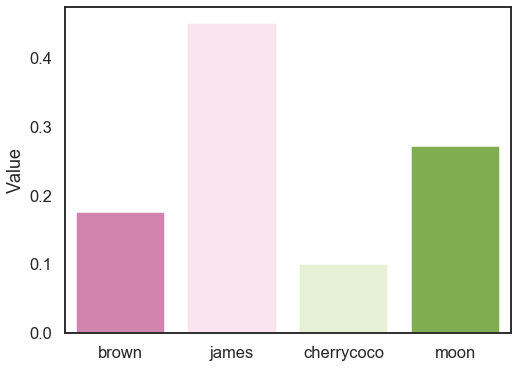


Index 3
[0.20475873 0.32596138 0.10212279 0.36715713]
予測：　　moon


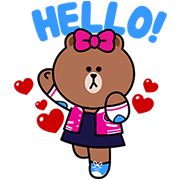

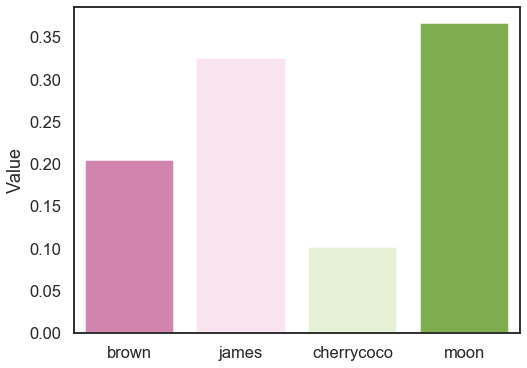


Index 4
[0.33171675 0.42472133 0.05500328 0.18855864]
予測：　　james


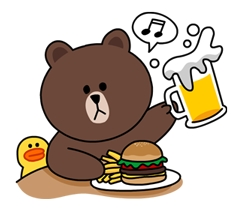

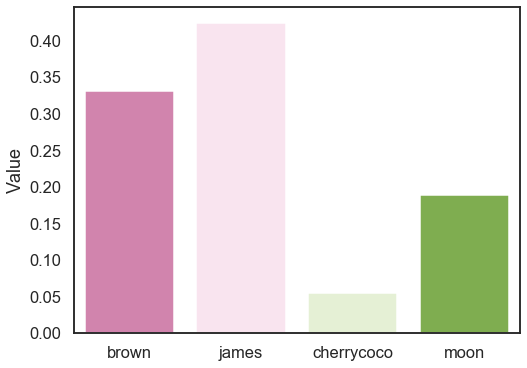


Index 5
[0.2530557  0.34101236 0.09131294 0.31461903]
予測：　　james


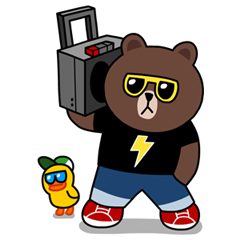

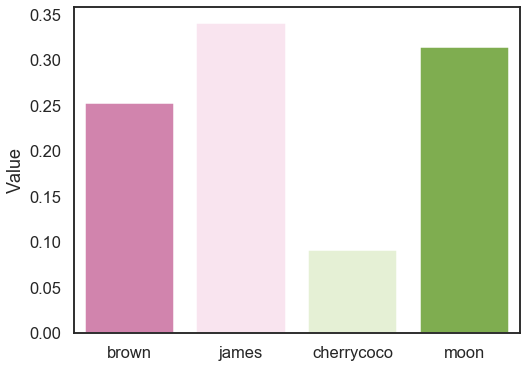


Index 6
[0.32454902 0.330279   0.07521749 0.26995453]
予測：　　james


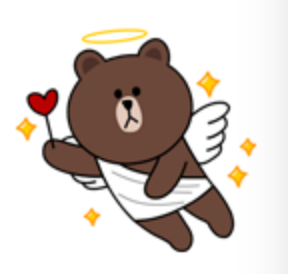

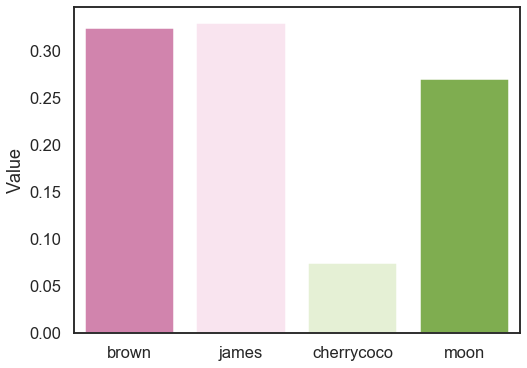


Index 7
[0.3916006  0.21967919 0.11821177 0.27050847]
予測：　　brown


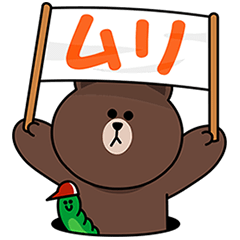

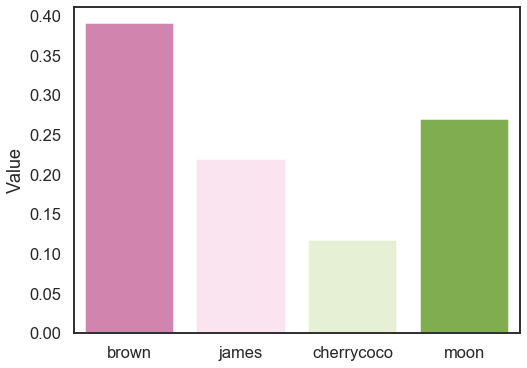


Index 8
[0.28294858 0.29788035 0.08972349 0.3294476 ]
予測：　　moon


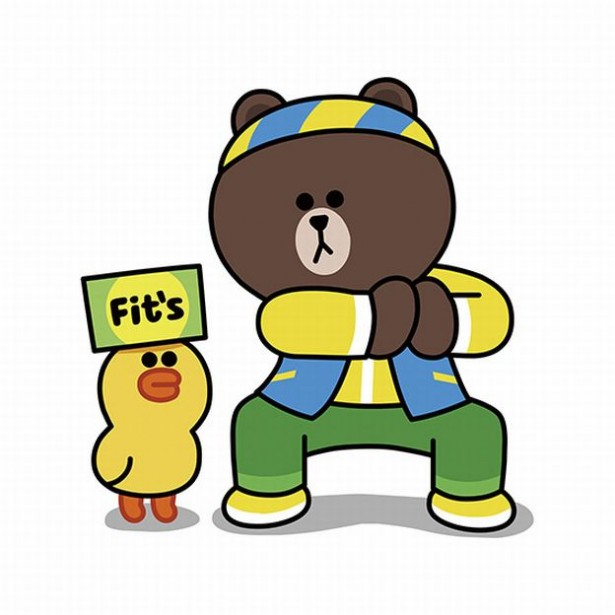

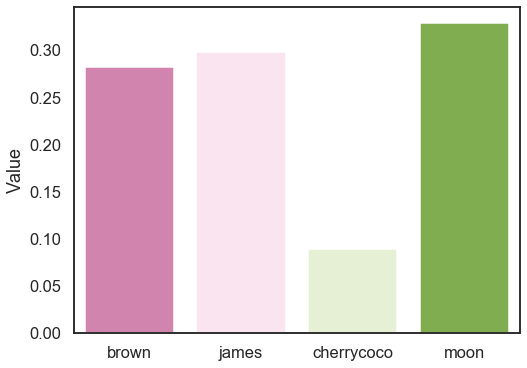


Index 9
[0.23344119 0.3803813  0.09839172 0.28778577]
予測：　　james


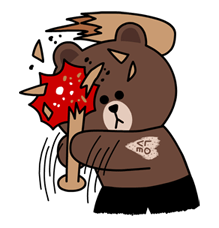

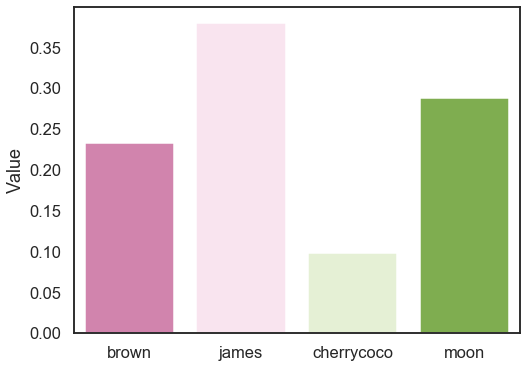


Index 10
[0.23686841 0.27126566 0.2246265  0.26723945]
予測：　　james


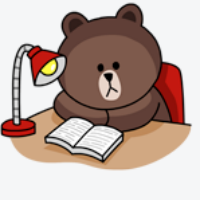

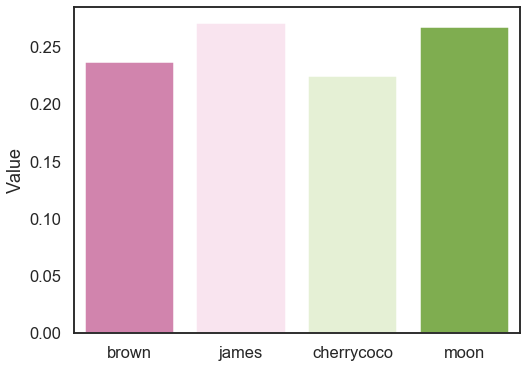


Index 11
[0.1816595  0.30596924 0.12060486 0.39176637]
予測：　　moon


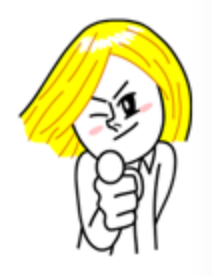

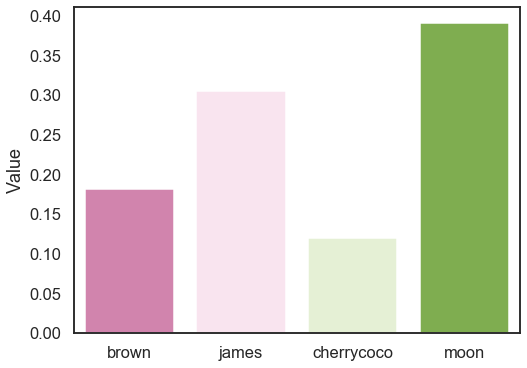


Index 12
[0.20994012 0.40928656 0.07541284 0.30536044]
予測：　　james


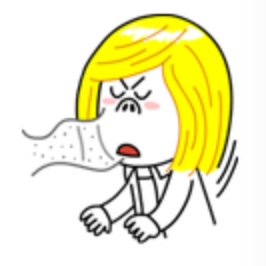

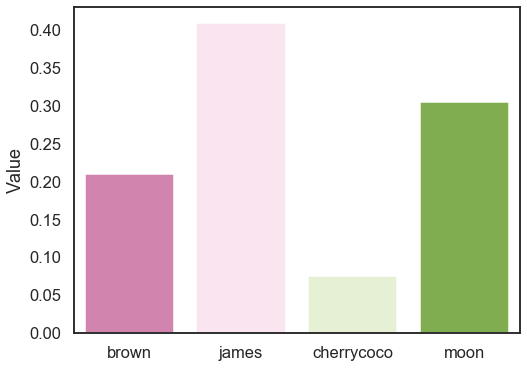


Index 13
[0.28042495 0.3743936  0.07282206 0.27235934]
予測：　　james


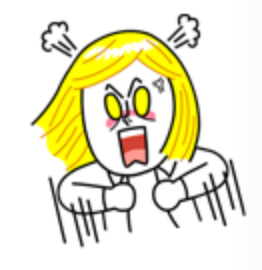

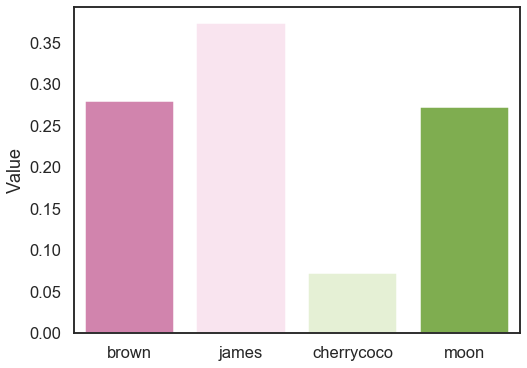


Index 14
[0.37143466 0.26821676 0.05527832 0.30507028]
予測：　　brown


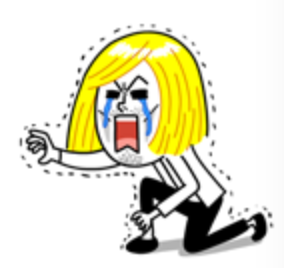

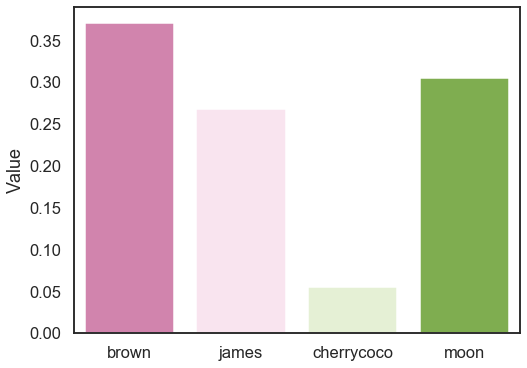


Index 15
[0.14958483 0.3150751  0.0895425  0.44579762]
予測：　　moon


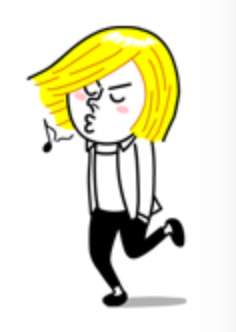

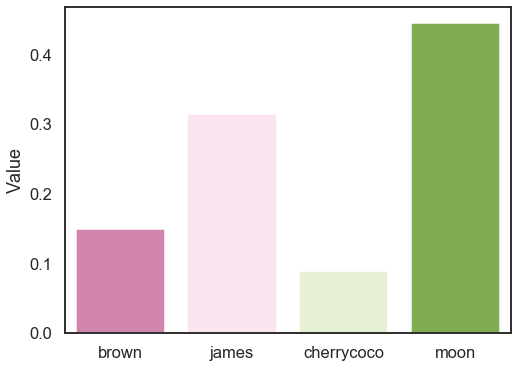


Index 16
[0.18172537 0.38796777 0.08222526 0.34808165]
予測：　　james


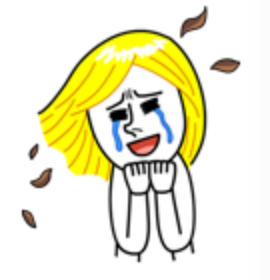

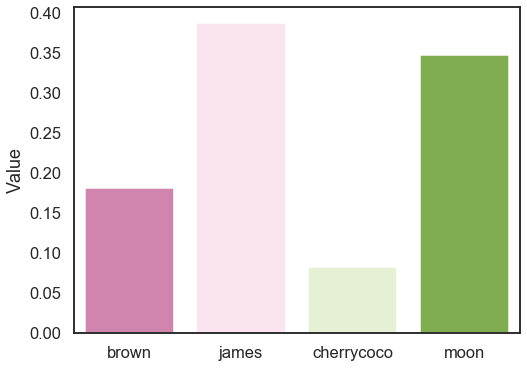


Index 17
[0.26837298 0.40155578 0.06787735 0.26219386]
予測：　　james


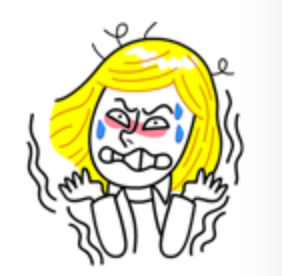

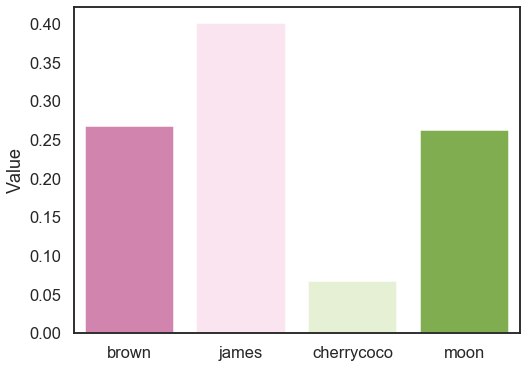


Index 18
[0.21346359 0.42216387 0.0742435  0.29012904]
予測：　　james


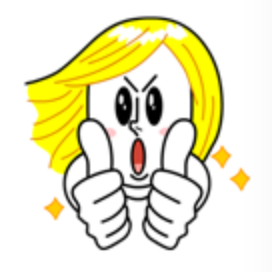

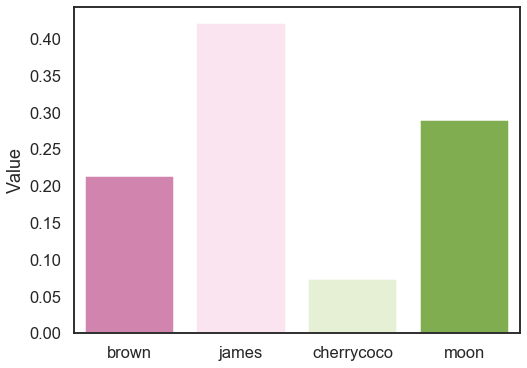


Index 19
[0.21268567 0.43475512 0.0878482  0.264711  ]
予測：　　james


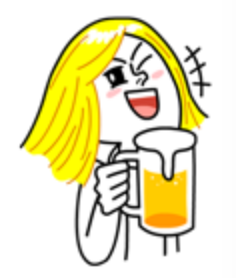

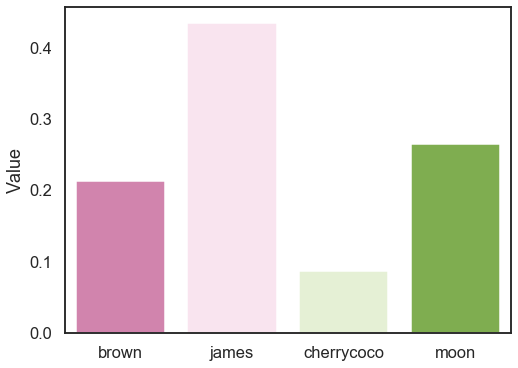


Index 20
[0.34151825 0.4106098  0.04561995 0.20225199]
予測：　　james


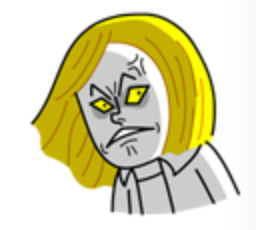

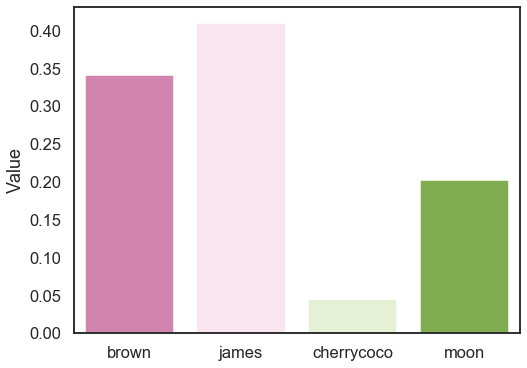


Index 21
[0.24715056 0.2843383  0.08752663 0.38098451]
予測：　　moon


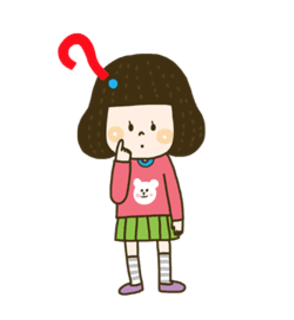

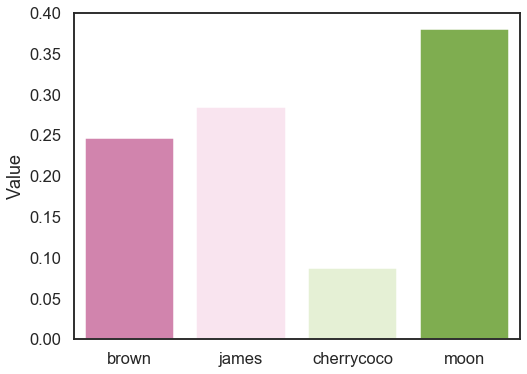


Index 22
[0.28898475 0.28570235 0.08567373 0.3396392 ]
予測：　　moon


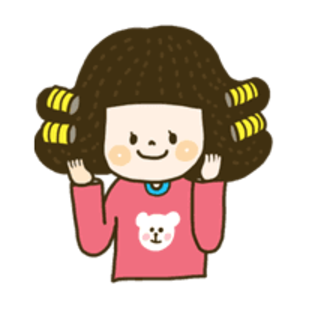

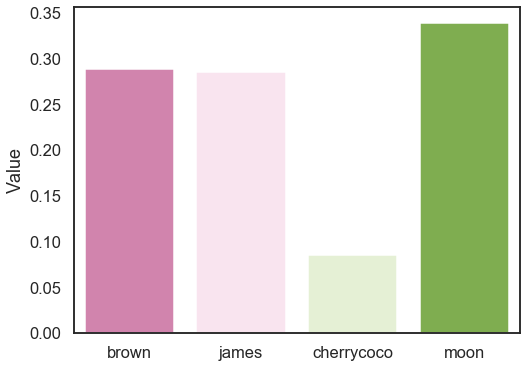


Index 23
[0.34087622 0.4691708  0.06144113 0.12851183]
予測：　　james


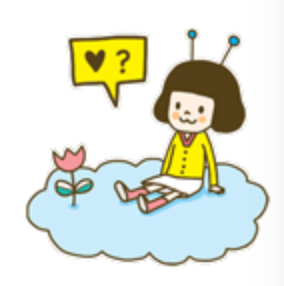

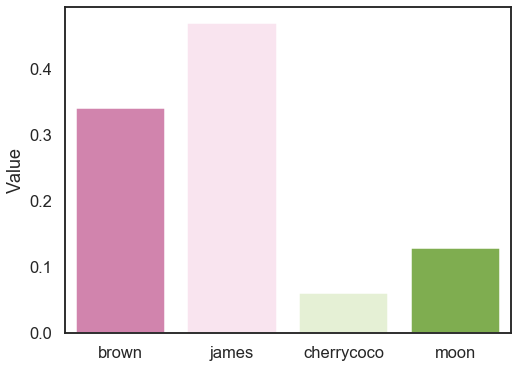


Index 24
[0.13071778 0.59262353 0.06019784 0.21646081]
予測：　　james


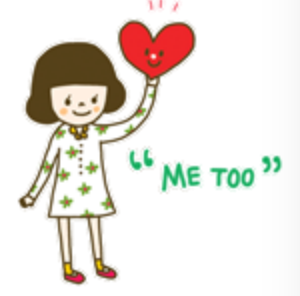

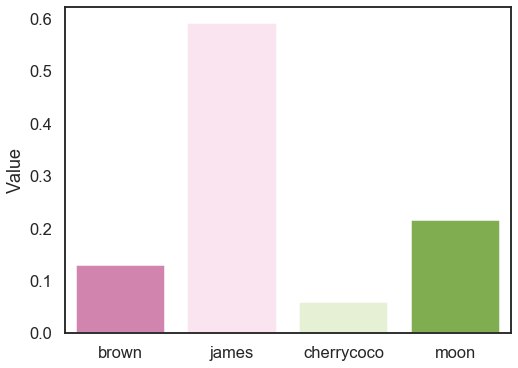


Index 25
[0.37184957 0.35202098 0.0762331  0.19989628]
予測：　　brown


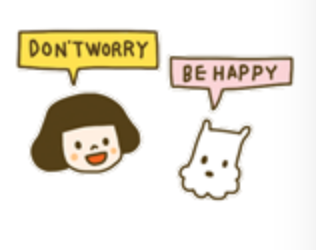

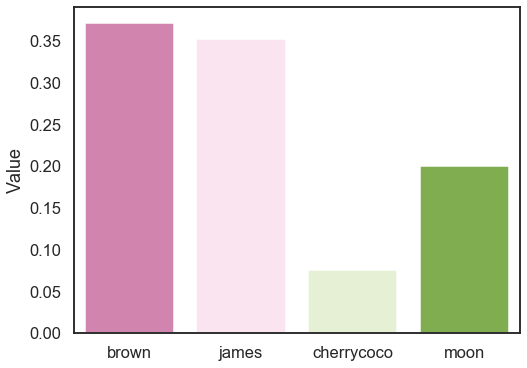


Index 26
[0.23020019 0.39436284 0.06233278 0.31310415]
予測：　　james


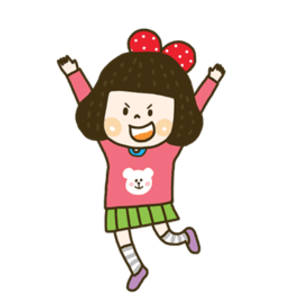

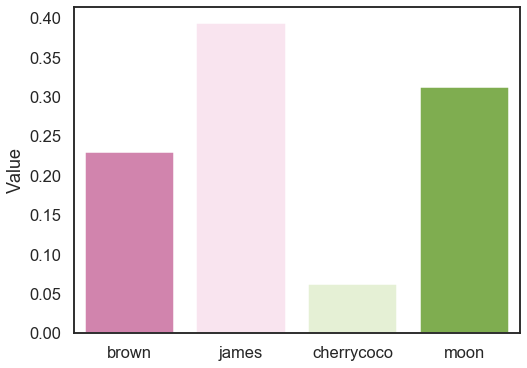


Index 27
[0.23196833 0.39582154 0.10728165 0.2649285 ]
予測：　　james


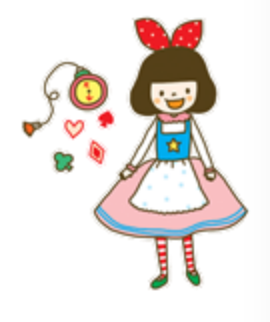

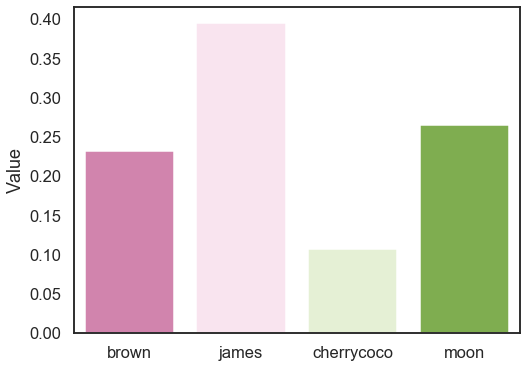


Index 28
[0.3998211  0.31548402 0.05020312 0.2344917 ]
予測：　　brown


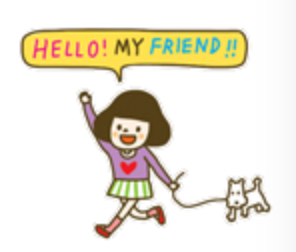

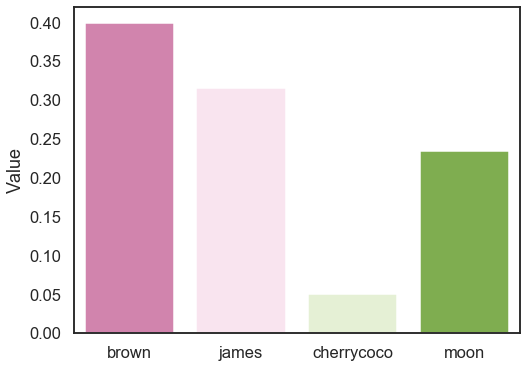


Index 29
[0.22855572 0.3418771  0.19912268 0.23044442]
予測：　　james


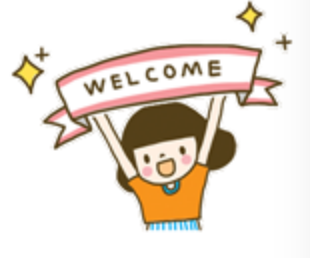

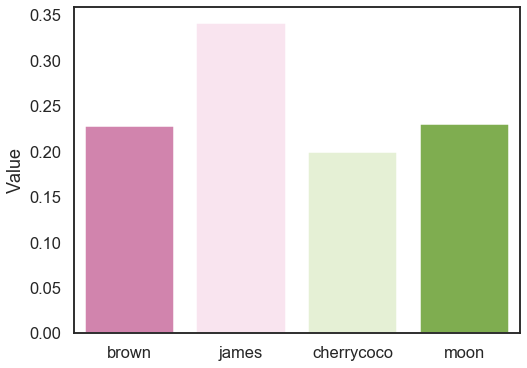


Index 30
[0.3150405  0.2922077  0.07718225 0.3155696 ]
予測：　　moon


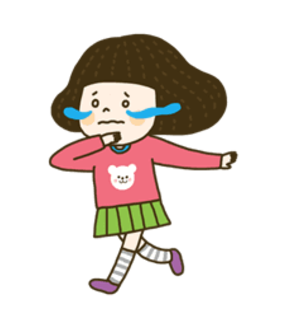

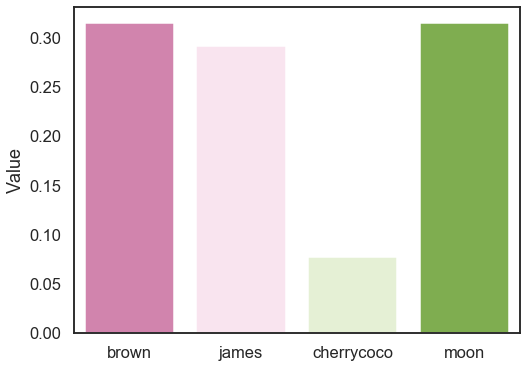


Index 31
[0.1960346  0.39210668 0.13201828 0.27984044]
予測：　　james


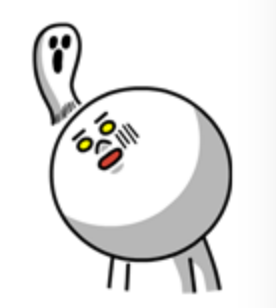

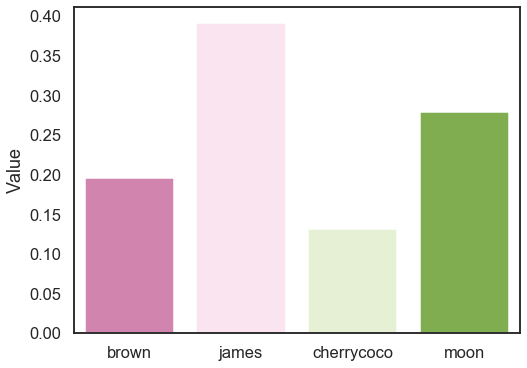


Index 32
[0.33840933 0.45355168 0.04061111 0.16742785]
予測：　　james


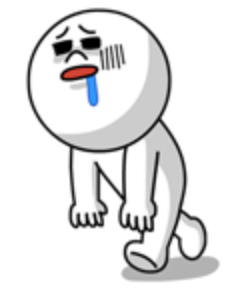

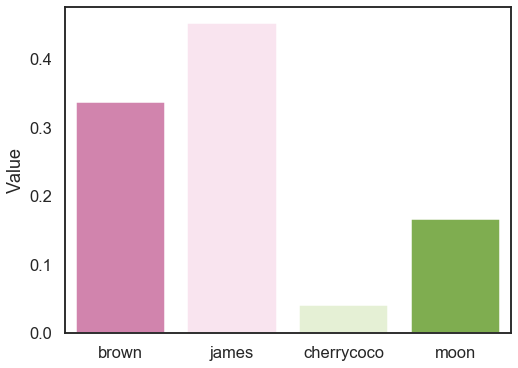


Index 33
[0.21941791 0.38973042 0.06018692 0.33066472]
予測：　　james


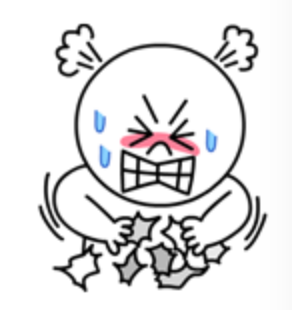

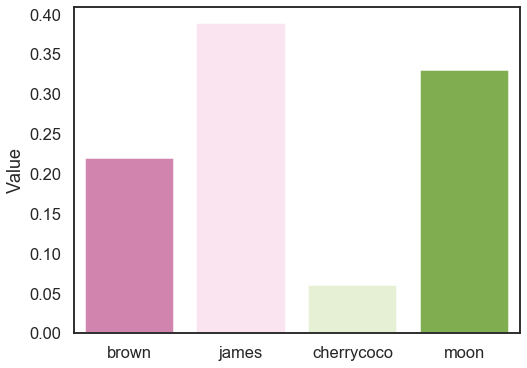


Index 34
[0.10627618 0.43669742 0.11941309 0.33761328]
予測：　　james


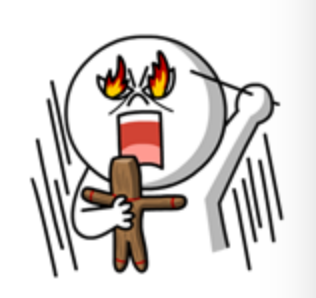

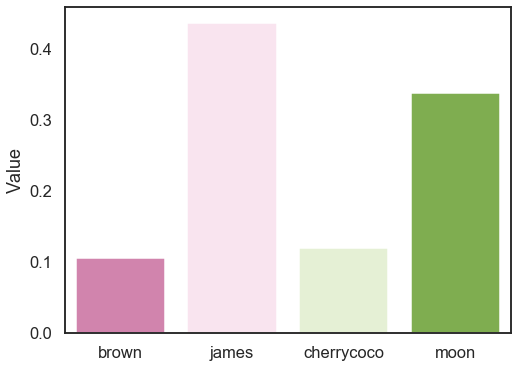


Index 35
[0.2539558  0.35195208 0.0828385  0.3112536 ]
予測：　　james


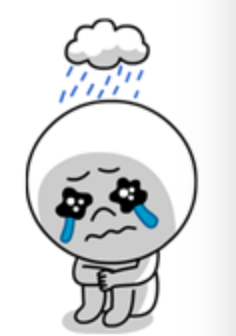

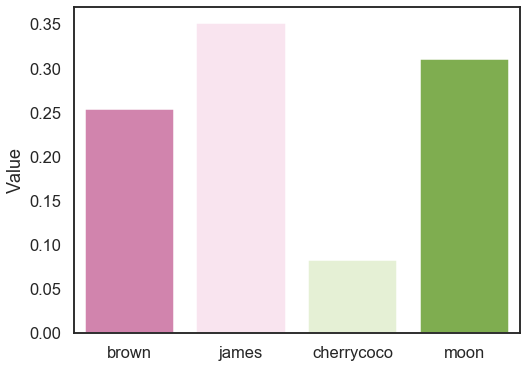


Index 36
[0.31632325 0.31125957 0.08323377 0.28918344]
予測：　　brown


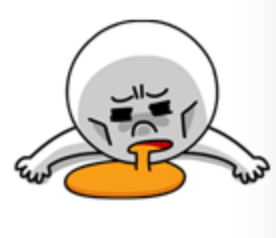

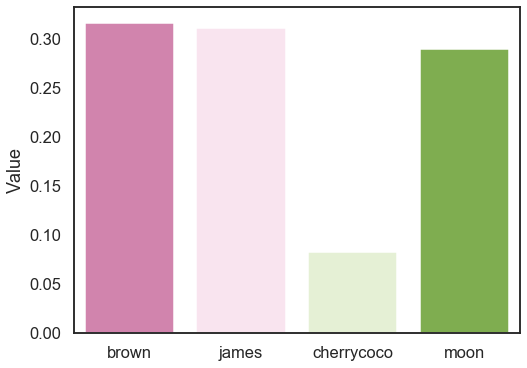


Index 37
[0.30855733 0.3374026  0.09830352 0.25573647]
予測：　　james


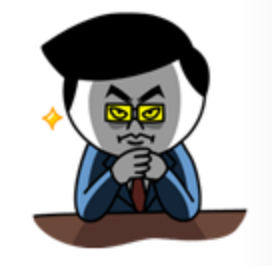

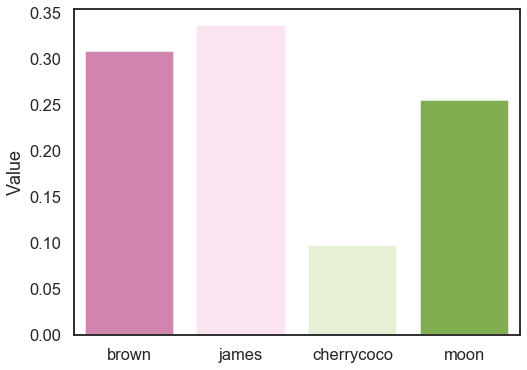


Index 38
[0.2633396  0.382538   0.05058952 0.30353284]
予測：　　james


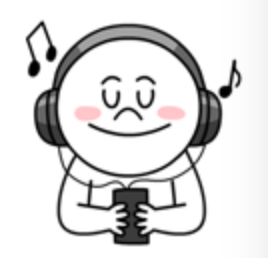

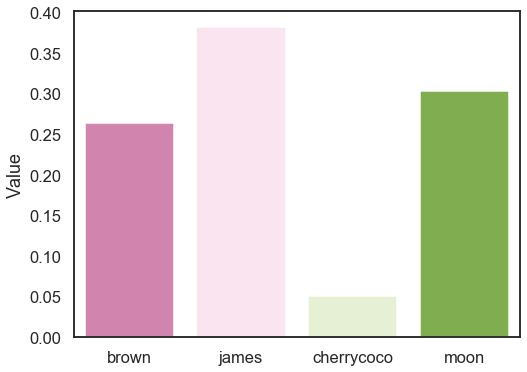


Index 39
[0.24728315 0.51445633 0.0469818  0.19127867]
予測：　　james


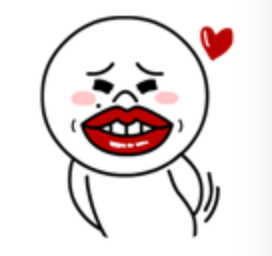

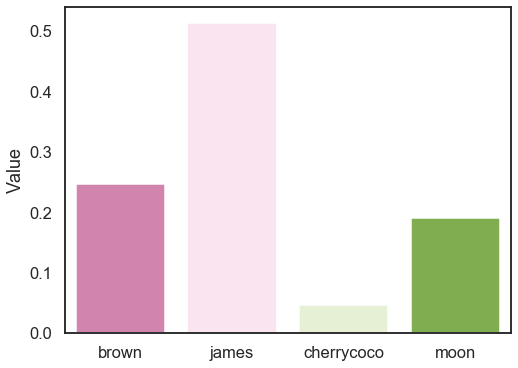


Index 40
[0.22760452 0.26236755 0.07820824 0.43181974]
予測：　　moon


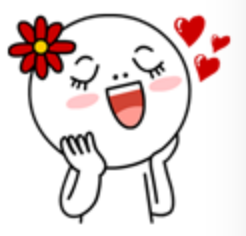

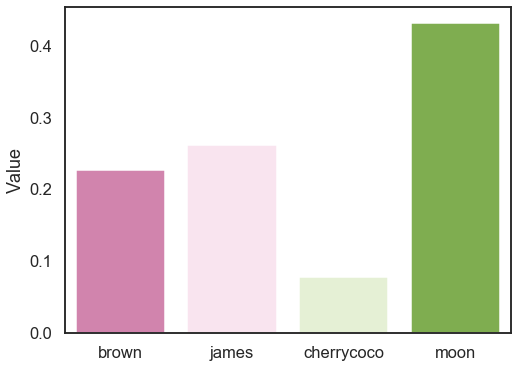

Epoch 3/20
3/3 [===========================>..] - ETA: 6s - loss: 2.5852 - acc: 0.1550 

In [ ]:
#↓ユーザはここ（nb_epoch）を指定
detector.fit(steps_per_epoch = 200, validation_steps = 40, nb_epoch = 20)